In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from astropy import table

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
def B_to_lat(B):
    return np.degrees(np.arcsin(B))

In [3]:
file = 'data/stats_table.csv'

df = pd.read_csv(file)

In [4]:
for s in df.columns:
    print(s)

ttest:out_of_transit&before_midtransit-vs-out_of_transit&after_midtransit
ks:in_transit&before_midtransit-vs-in_transit&after_midtransit
anderson:in_transit&before_midtransit-vs-in_transit&after_midtransit
anderson:out_of_transit&before_midtransit-vs-out_of_transit&after_midtransit
ks:out_of_transit&before_midtransit-vs-out_of_transit&after_midtransit
rms_ratio
kepid
ks:in_transit-vs-out_of_transit
ttest:in_transit&before_midtransit-vs-in_transit&after_midtransit
anderson:in_transit-vs-out_of_transit
ttest:in_transit-vs-out_of_transit
A
AUPPER
ALOWER
UA
AREF
AURL
AR
ARUPPER
ARLOWER
UAR
ARREF
ARURL
ASTROMETRY
B
BUPPER
BLOWER
UB
BREF
BURL
BIGOM
BIGOMUPPER
BIGOMLOWER
UBIGOM
BIGOMREF
BIGOMURL
BINARY
BINARYREF
BINARYURL
BMV
CHI2
COMP
DATE
DEC
DEC_STRING
DENSITY
DENSITYUPPER
DENSITYLOWER
UDENSITY
DENSITYREF
DENSITYURL
DEPTH
DEPTHUPPER
DEPTHLOWER
UDEPTH
DEPTHREF
DEPTHURL
DIST
DISTUPPER
DISTLOWER
UDIST
DISTREF
DISTURL
DR
DRUPPER
DRLOWER
UDR
DRREF
DRURL
DVDT
DVDTUPPER
DVDTLOWER
UDVDT
DVDTREF
DV

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


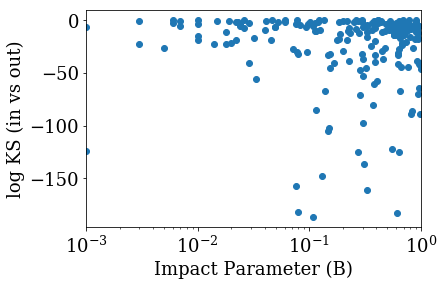

In [5]:
plt.scatter(df['B'], np.log10(df['ks:in_transit-vs-out_of_transit']))
plt.xscale('log')
plt.xlim(1e-3,1)
plt.xlabel('Impact Parameter (B)')
plt.ylabel('log KS (in vs out)')

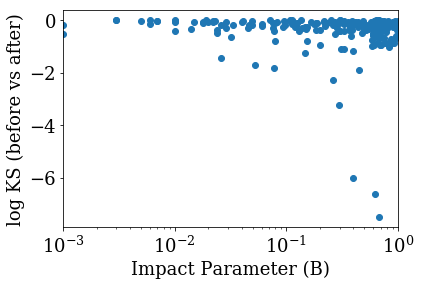

In [6]:
plt.scatter(df['B'], np.log10(df['ks:out_of_transit&before_midtransit-vs-out_of_transit&after_midtransit']))
plt.xscale('log')
plt.xlim(1e-3,1)
plt.xlabel('Impact Parameter (B)')
plt.ylabel('log KS (before vs after)')

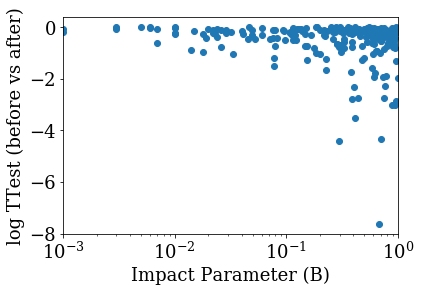

In [7]:
plt.scatter(df['B'], np.log10(df['ttest:out_of_transit&before_midtransit-vs-out_of_transit&after_midtransit']))
plt.xscale('log')
plt.xlim(1e-3,1)
plt.xlabel('Impact Parameter (B)')
plt.ylabel('log TTest (before vs after)')

In [8]:
# sum((np.log10(df.iloc[:,3]) > -1.5) & # KS before/after
#     (np.log10(df.iloc[:,2]) > -0.7)) # TTest before/after

# ok = (np.log10(df.iloc[:,3]) > -1.5) & (np.log10(df.iloc[:,2]) > -1)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


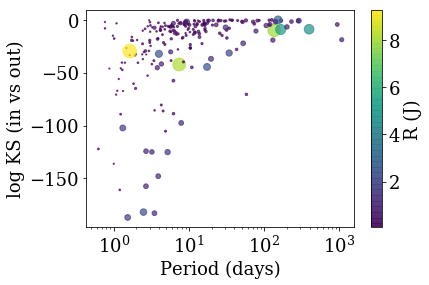

In [9]:
plt.scatter(df['PER'], np.log10(df['ks:in_transit-vs-out_of_transit']), 
            s=(df['R']*20), c=df['R'], alpha=0.7)

plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('log KS (in vs out)')
cm = plt.colorbar()
cm.set_label('R (J)')

In [10]:
ok20 = ((np.log10(df['ttest:out_of_transit&before_midtransit-vs-out_of_transit&after_midtransit']) > -2) & 
        (np.log10(df['ks:out_of_transit&before_midtransit-vs-out_of_transit&after_midtransit']) > -1.7) & 
        (df['PER'] >= 10))
sum(ok20)

77

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


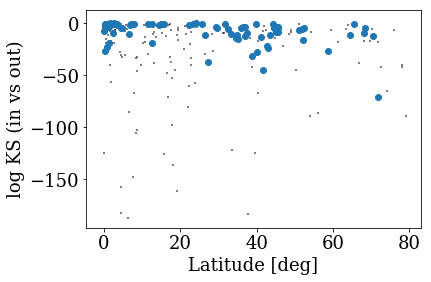

In [11]:
plt.scatter(B_to_lat(df['B']), np.log10(df['ks:in_transit-vs-out_of_transit']), s=5, c='k',alpha=0.5, marker='+')
# plt.scatter(B_to_lat(df['B'])[ok10], np.log10(df.iloc[:,1])[ok10])
plt.scatter(B_to_lat(df['B'])[ok20], np.log10(df['ks:in_transit-vs-out_of_transit'])[ok20])

plt.xlabel('Latitude [deg]')
plt.ylabel('log KS (in vs out)')
# plt.ylim(5,-50)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


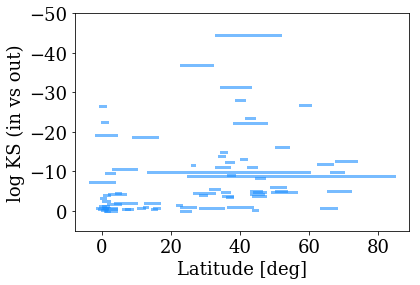

In [12]:
for k in range(sum(ok20)):
    plt.plot([B_to_lat(df['B'] - df['RR']/2.)[ok20].values[k], B_to_lat(df['B'] + df['RR']/2.)[ok20].values[k]],
             [np.log10(df['ks:in_transit-vs-out_of_transit'])[ok20].values[k], 
              np.log10(df['ks:in_transit-vs-out_of_transit'])[ok20].values[k]], 
             c='DodgerBlue', lw=3, alpha=0.6)

plt.xlabel('Latitude [deg]')
plt.ylabel('log KS (in vs out)')
plt.ylim(5,-50);

In [13]:
# '''
# does the span of latitudes sampled correlate with the scatter measured?
# -> doesnt seem so, no
# '''
# plt.scatter(np.abs(B_to_lat(df['B'] - df['RR']/2.)[ok20] - B_to_lat(df['B'] + df['RR']/2.)[ok20]),
#             np.log10(df.iloc[:,1])[ok20])
# plt.xlabel('Latitude Span [deg]')
# plt.ylabel('log KS (in vs out)')
# plt.ylim(5,-50);
# # plt.xlim(0,10)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


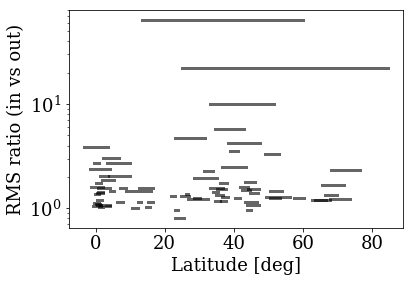

In [23]:
for k in range(sum(ok20)):
    plt.plot([B_to_lat(df['B'] - df['RR']/2.)[ok20].values[k], 
              B_to_lat(df['B'] + df['RR']/2.)[ok20].values[k]],
             [df['rms_ratio'][ok20].values[k], 
              df['rms_ratio'][ok20].values[k]], 
             c='k', lw=3, alpha=0.6)

plt.xlabel('Latitude [deg]')
plt.ylabel('RMS ratio (in vs out)')
plt.yscale('log')
# plt.xlim(-5,20)
plt.savefig('kepler_rms.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


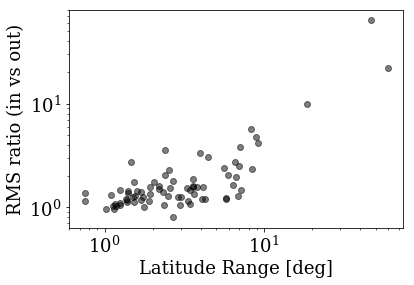

In [24]:
plt.scatter(B_to_lat(df['B'] + df['RR']/2.)[ok20] - B_to_lat(df['B'] - df['RR']/2.)[ok20], 
            df['rms_ratio'][ok20], c='k',alpha=0.5)

plt.xlabel('Latitude Range [deg]')
plt.ylabel('RMS ratio (in vs out)')
plt.yscale('log')
plt.xscale('log')
plt.savefig('kepler_size.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)